In this notebook, I'll be completing an analysis to check whether the independent variables of bleeding study data are independent or correlated. 

The continous variables are: 
1. Age
2. Platelet Nadir while on Ibruntinib
3. Prior lines of therapy (using the continous column of data) 

The continous variables below need to be analyzed on their own, since they both only have data at the time of bleed, and since this data is only used for one sub-analysis regression model. 
1. Platelet at the time of bleed 
2. Hb at the time of bleed 

The categorical variables are: 
1. Gender (M/F) 
2. Platelets <50 (Y/N) 
3. Anemia (hb < 100) (Y/N) 
4. Anemia (hb < 110) (Y/N) 
5. HR Molecular/Cytogenetics (Y/N)
6. Anticoagulation (Y/N)
7. Anti-platelet (Y/N)
8. PMHx bleeding risk (Y/N)
9. Prior lines of therapy 1,2,3,4,6 (using categorical columns of data. 
10. Major bleed and Minor bleed (the 2 categorical dummy variables)

Load necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('complete')

complete


Read dataset

In [2]:
df = pd.read_csv("/Users/anthonyquint/Desktop/LHSC_Work_Folder/Mina/Bleeding_study/Ibrutinib Data Set, July 13,2021, de-identified data.csv")
#df.head()

Split into the 2 continous dataframes, and clean data. 

In [3]:
df_cont = df[['Age at diagnosis','Plt Nadir while on Ibrutinib','Prior lines of therapy' ]]
df_cont2 = df[['plt at the time of bleed','hb at the time of bleed']]
df_cont2 = df_cont2.dropna().copy() 

# Delete index 112 since it has a question mark for age 
df_cont = df_cont.drop(labels=112, axis=0)

#df_cont2.head()

Check the first set of continous variables for correlations.

                              Age at diagnosis  Plt Nadir while on Ibrutinib  \
Age at diagnosis                      1.000000                      0.205199   
Plt Nadir while on Ibrutinib          0.205199                      1.000000   
Prior lines of therapy               -0.303865                     -0.291469   

                              Prior lines of therapy  
Age at diagnosis                           -0.303865  
Plt Nadir while on Ibrutinib               -0.291469  
Prior lines of therapy                      1.000000  


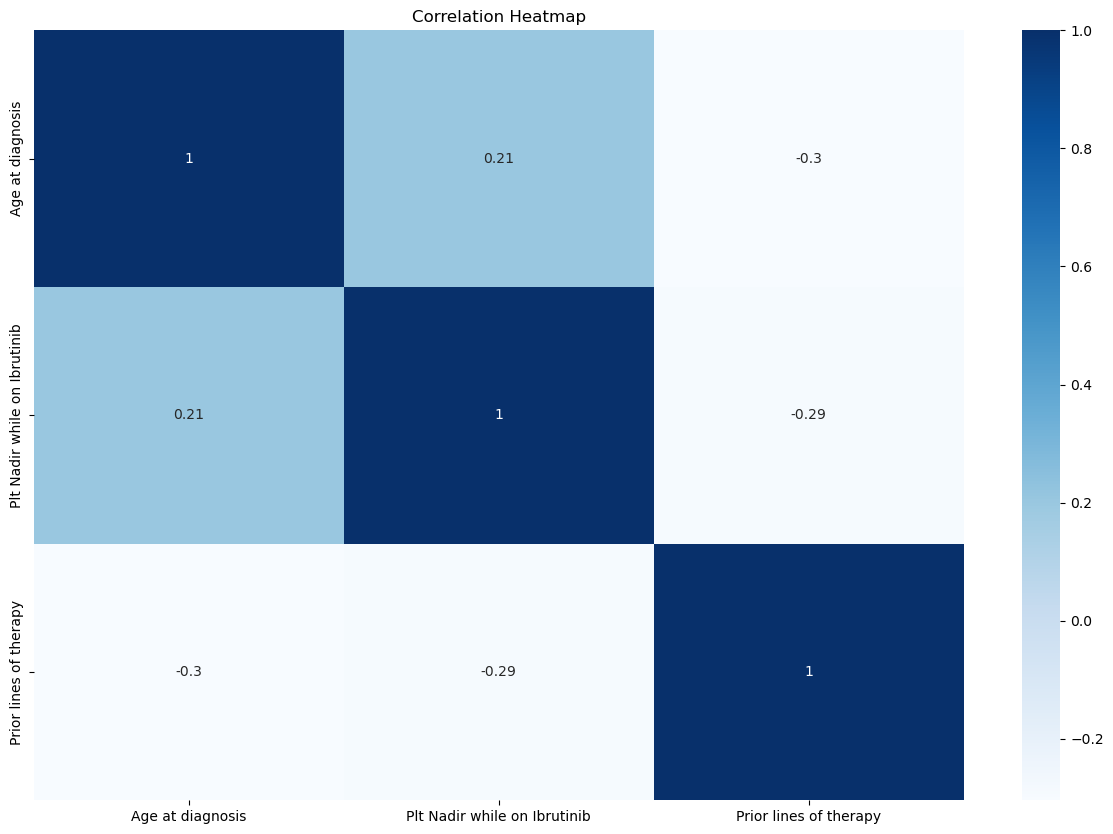

In [4]:
df_cont["Age at diagnosis"] = pd.to_numeric(df_cont["Age at diagnosis"], downcast="float")

print(df_cont.corr(method='pearson'))
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_cont.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")
fig

Check the second set of continous variables for correlations.

                          plt at the time of bleed  hb at the time of bleed
plt at the time of bleed                  1.000000                 0.317851
hb at the time of bleed                   0.317851                 1.000000


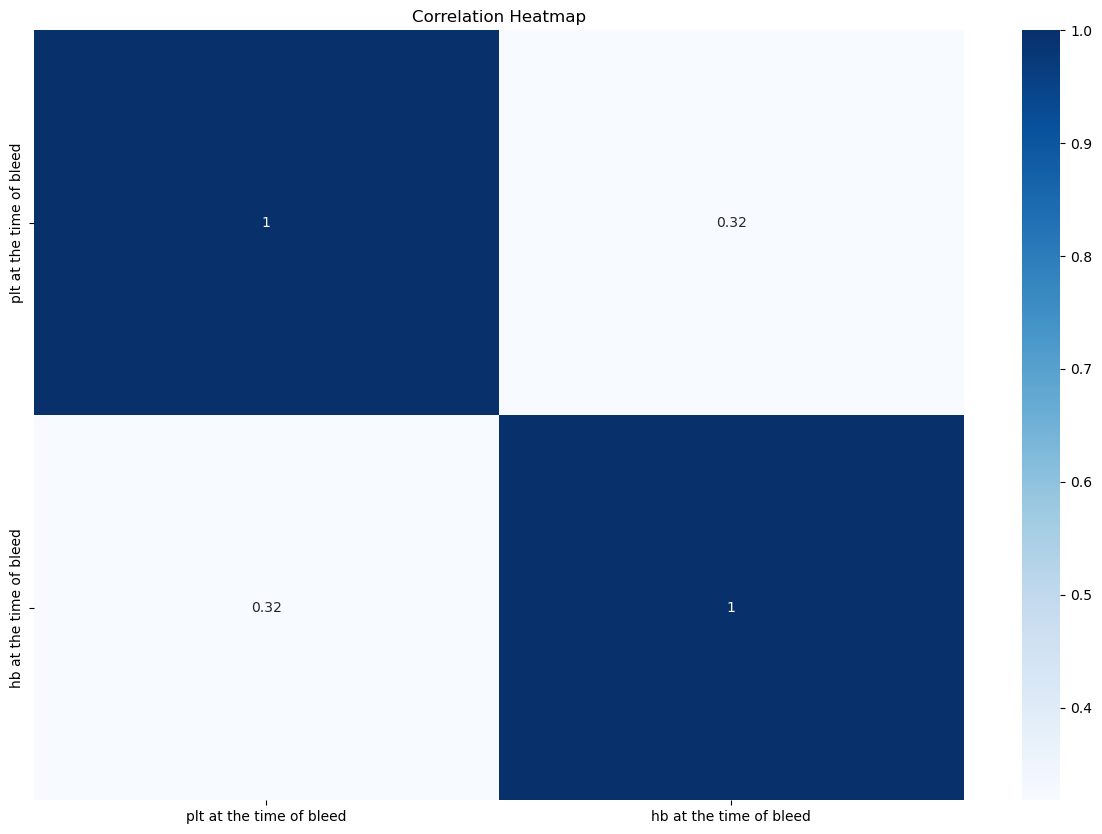

In [5]:
df_cont2["plt at the time of bleed"] = pd.to_numeric(df_cont2["plt at the time of bleed"], downcast="float")
df_cont2["hb at the time of bleed"] = pd.to_numeric(df_cont2["hb at the time of bleed"], downcast="float")

print(df_cont2.corr(method='pearson'))
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_cont2.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")
fig